<a href="https://colab.research.google.com/github/TahaThinks/DataScienceProjects2024/blob/main/Google_Play_Store_App_Analytics_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [ ]:
import pandas as pd


# Notebook Presentation

In [ ]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [ ]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [ ]:
print(f'Number of Columns: {df_apps.shape[1]}')
print(f'Number of Rows: {df_apps.shape[0]}')

Number of Columns: 12
Number of Rows: 10841


In [ ]:
list(df_apps.columns)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size_MBs',
 'Installs',
 'Type',
 'Price',
 'Content_Rating',
 'Genres',
 'Last_Updated',
 'Android_Ver']

In [ ]:
df_apps.sample(5)

App Category  Rating  Reviews  Size_MBs    Installs  \
393    EB Demo for Android   FAMILY     NaN        0     13.00          10   
567            UM BP Track  MEDICAL    2.00        1     29.00          50   
10164    Flashlight HD LED    TOOLS    4.30   618918      3.40  50,000,000   
4071              U-Report   SOCIAL    4.30      241      7.50      10,000   
4002       CG Samanya Gyan   FAMILY    4.20      145      4.10      10,000   

       Type Price Content_Rating         Genres        Last_Updated  \
393    Free     0           Teen  Entertainment        May 17, 2017   
567    Free     0       Everyone        Medical       June 27, 2017   
10164  Free     0       Everyone          Tools       July 28, 2018   
4071   Free     0           Teen         Social      April 10, 2018   
4002   Free     0           Teen      Education  September 12, 2017   

              Android_Ver  
393            4.1 and up  
567            5.0 and up  
10164  Varies with device  
4071         4.0.3 and up  
4002           2.3 and up

### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns.

In [ ]:
df_apps_new = df_apps.drop(columns=['Last_Updated', 'Android_Ver' ])
df_apps_new

App         Category  Rating  \
0                           Ak Parti Yardım Toplama           SOCIAL     NaN   
1                        Ain Arabic Kids Alif Ba ta           FAMILY     NaN   
2      Popsicle Launcher for Android P 9.0 launcher  PERSONALIZATION     NaN   
3                         Command & Conquer: Rivals           FAMILY     NaN   
4                                        CX Network         BUSINESS     NaN   
...                                             ...              ...     ...   
10836                                Subway Surfers             GAME    4.50   
10837                                Subway Surfers             GAME    4.50   
10838                                Subway Surfers             GAME    4.50   
10839                                Subway Surfers             GAME    4.50   
10840                                Subway Surfers             GAME    4.50   

        Reviews  Size_MBs       Installs  Type   Price Content_Rating  \
0             0      8.70              0  Paid  $13.99           Teen   
1             0     33.00              0  Paid   $2.99       Everyone   
2             0      5.50              0  Paid   $1.49       Everyone   
3             0     19.00              0   NaN       0   Everyone 10+   
4             0     10.00              0  Free       0       Everyone   
...         ...       ...            ...   ...     ...            ...   
10836  27723193     76.00  1,000,000,000  Free       0   Everyone 10+   
10837  27724094     76.00  1,000,000,000  Free       0   Everyone 10+   
10838  27725352     76.00  1,000,000,000  Free       0   Everyone 10+   
10839  27725352     76.00  1,000,000,000  Free       0   Everyone 10+   
10840  27711703     76.00  1,000,000,000  Free       0   Everyone 10+   

                Genres  
0               Social  
1            Education  
2      Personalization  
3             Strategy  
4             Business  
...                ...  
10836           Arcade  
10837           Arcade  
10838           Arcade  
10839           Arcade  
10840           Arcade  

[10841 rows x 10 columns]

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows.

In [ ]:
print(f"Number of Rows with NaN Rating: {df_apps_clean['Rating'].isna().sum()}")

Number of Rows with NaN Rating: 1474


In [ ]:
df_apps_clean = df_apps_new[df_apps_new['Rating'].notna()]

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`.


In [ ]:
df_apps_clean.duplicated(subset=["App"]).count()

8197

In [ ]:
df_apps_clean['App'].value_counts()["Instagram"]

4

In [ ]:
df_apps_clean.drop_duplicates(subset="App", keep='first', inplace=False, ignore_index=False)

App            Category  \
21                                 KBA-EZ Health Guide             MEDICAL   
28                                            Ra Ga Ba                GAME   
47                                             Mu.F.O.                GAME   
82                                    Brick Breaker BR                GAME   
99     Anatomy & Physiology Vocabulary Exam Review App             MEDICAL   
...                                                ...                 ...   
10824                                     Google Drive        PRODUCTIVITY   
10828                                          YouTube       VIDEO_PLAYERS   
10829                          Google Play Movies & TV       VIDEO_PLAYERS   
10831                                      Google News  NEWS_AND_MAGAZINES   
10835                                   Subway Surfers                GAME   

       Rating   Reviews  Size_MBs       Installs  Type  Price Content_Rating  \
21       5.00         4     25.00              1  Free      0       Everyone   
28       5.00         2     20.00              1  Paid  $1.49       Everyone   
47       5.00         2     16.00              1  Paid  $0.99       Everyone   
82       5.00         7     19.00              5  Free      0       Everyone   
99       5.00         1      4.60              5  Free      0       Everyone   
...       ...       ...       ...            ...   ...    ...            ...   
10824    4.40   2731171      4.00  1,000,000,000  Free      0       Everyone   
10828    4.30  25655305      4.65  1,000,000,000  Free      0           Teen   
10829    3.70    906384      4.65  1,000,000,000  Free      0           Teen   
10831    3.90    877635     13.00  1,000,000,000  Free      0           Teen   
10835    4.50  27722264     76.00  1,000,000,000  Free      0   Everyone 10+   

                        Genres  
21                     Medical  
28                      Arcade  
47                      Arcade  
82                      Arcade  
99                     Medical  
...                        ...  
10824             Productivity  
10828  Video Players & Editors  
10829  Video Players & Editors  
10831         News & Magazines  
10835                   Arcade  

[8197 rows x 10 columns]

In [ ]:
df_apps_clean.value_counts()

App                                                 Category            Rating  Reviews  Size_MBs  Installs    Type  Price  Content_Rating  Genres          
+Download 4 Instagram Twitter                       SOCIAL              4.50    40467    22.00     1,000,000   Free  0      Everyone        Social              1
Middlesbrough FC Official                           SPORTS              4.50    152      36.00     10,000      Free  0      Everyone        Sports              1
News by The Times of India Newspaper - Latest News  NEWS_AND_MAGAZINES  4.20    522205   6.30      10,000,000  Free  0      Everyone        News & Magazines    1
News Republic                                       NEWS_AND_MAGAZINES  4.30    479594   18.00     10,000,000  Free  0      Teen            News & Magazines    1
News Minecraft.fr                                   NEWS_AND_MAGAZINES  3.80    881      2.30      100,000     Free  0      Everyone        News & Magazines    1
                                                                                                                                                               ..
Download All Files                                  TOOLS               3.80    120494   2.30      10,000,000  Free  0      Everyone        Tools               1
Download Accelerator Plus                           TOOLS               4.20    43677    3.40      1,000,000   Free  0      Everyone        Tools               1
Down Dog: Great Yoga Anywhere                       HEALTH_AND_FITNESS  4.90    28945    12.00     500,000     Free  0      Teen            Health & Fitness    1
Dots puzzle                                         FAMILY              4.00    179      14.00     50,000      Paid  $0.99  Everyone        Puzzle              1
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    ENTERTAINMENT       4.70    11661    4.00      1,000,000   Free  0      Everyone        Entertainment       1
Name: count, Length: 8197, dtype: int64

# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [ ]:
df_apps_clean.sort_values(by=["Rating","Reviews"], ascending=False)

App      Category  Rating  \
2095                                         Ríos de Fe     LIFESTYLE    5.00   
2438  FD Calculator (EMI, SIP, RD & Loan Eligilibility)       FINANCE    5.00   
3115                                         Oración CX     LIFESTYLE    5.00   
2107                     Barisal University App-BU Face        FAMILY    5.00   
2069                                         Master E.K        FAMILY    5.00   
...                                                 ...           ...     ...   
728                       Truck Driving Test Class 3 BC        FAMILY    1.00   
1208                                     Thistletown CI  PRODUCTIVITY    1.00   
1271                                             MbH BM       MEDICAL    1.00   
1314                                        CR Magazine      BUSINESS    1.00   
2416                   BJ Bridge Standard American 2018          GAME    1.00   

      Reviews  Size_MBs Installs  Type  Price Content_Rating        Genres  
2095      141     15.00    1,000  Free      0       Everyone     Lifestyle  
2438      104      2.30    1,000  Free      0       Everyone       Finance  
3115      103      3.80    5,000  Free      0       Everyone     Lifestyle  
2107      100     10.00    1,000  Free      0       Everyone     Education  
2069       90     19.00    1,000  Free      0       Everyone     Education  
...       ...       ...      ...   ...    ...            ...           ...  
728         1      2.00       50  Paid  $1.49       Everyone     Education  
1208        1      6.60      100  Free      0       Everyone  Productivity  
1271        1      2.30      100  Free      0       Everyone       Medical  
1314        1      7.80      100  Free      0       Everyone      Business  
2416        1      4.90    1,000  Free      0       Everyone          Card  

[8197 rows x 10 columns]

# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please?

In [ ]:
df_apps_clean.sort_values(by=['Size_MBs'], ascending=False).head(5)

App            Category  Rating  Reviews  \
9942   Talking Babsy Baby: Baby Games           LIFESTYLE    4.00   140995   
10687          Hungry Shark Evolution                GAME    4.50  6074334   
9943            Miami crime simulator                GAME    4.00   254518   
9944     Gangster Town: Vice District              FAMILY    4.30    65146   
3144                       Vi Trainer  HEALTH_AND_FITNESS    3.60      124   

       Size_MBs     Installs  Type Price Content_Rating  \
9942     100.00   10,000,000  Free     0       Everyone   
10687    100.00  100,000,000  Free     0           Teen   
9943     100.00   10,000,000  Free     0     Mature 17+   
9944     100.00   10,000,000  Free     0     Mature 17+   
3144     100.00        5,000  Free     0       Everyone   

                       Genres  
9942   Lifestyle;Pretend Play  
10687                  Arcade  
9943                   Action  
9944               Simulation  
3144         Health & Fitness

# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [ ]:
df_apps_clean.sort_values(by=['Reviews'], ascending=False).head(5)

App       Category  Rating  \
10805                                  Facebook         SOCIAL    4.10   
10785                        WhatsApp Messenger  COMMUNICATION    4.40   
10806                                 Instagram         SOCIAL    4.50   
10784  Messenger – Text and Video Chat for Free  COMMUNICATION    4.00   
10650                            Clash of Clans           GAME    4.60   

        Reviews  Size_MBs       Installs  Type Price Content_Rating  \
10805  78158306      5.30  1,000,000,000  Free     0           Teen   
10785  69119316      3.50  1,000,000,000  Free     0       Everyone   
10806  66577313      5.30  1,000,000,000  Free     0           Teen   
10784  56642847      3.50  1,000,000,000  Free     0       Everyone   
10650  44891723     98.00    100,000,000  Free     0   Everyone 10+   

              Genres  
10805         Social  
10785  Communication  
10806         Social  
10784  Communication  
10650       Strategy

# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [ ]:
import plotly.express as px
import numpy

In [ ]:
# app_names = list(df_apps_clean['App'])
values = df_apps_clean['Content_Rating'].value_counts()
content_type = list(df_apps_clean['Content_Rating'].unique())

In [ ]:
fig = px.pie(values=values, names=content_type)

In [ ]:
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install?

Check the datatype of the Installs column.

Count the number of apps at each level of installations.

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first.

In [ ]:
df_apps_clean.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size_MBs          float64
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
dtype: object

In [ ]:
# We need to convert the Install Datatype from str to int
# df_apps_clean["Installs"] = df_apps_clean['Installs'].str.replace(",","").astype(float)
df_apps_clean.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size_MBs          float64
Installs          float64
Type               object
Price              object
Content_Rating     object
Genres             object
dtype: object

In [ ]:
df_apps_clean[df_apps_clean["Installs"] >= 1_000_000_000]

App             Category  Rating  \
10783                         Google Play Books  BOOKS_AND_REFERENCE    3.90   
10784  Messenger – Text and Video Chat for Free        COMMUNICATION    4.00   
10785                        WhatsApp Messenger        COMMUNICATION    4.40   
10786              Google Chrome: Fast & Secure        COMMUNICATION    4.30   
10787                                     Gmail        COMMUNICATION    4.30   
10788                                  Hangouts        COMMUNICATION    4.00   
10792             Skype - free IM & video calls        COMMUNICATION    4.10   
10803                         Google Play Games        ENTERTAINMENT    4.30   
10805                                  Facebook               SOCIAL    4.10   
10806                                 Instagram               SOCIAL    4.50   
10807                                   Google+               SOCIAL    4.20   
10813                             Google Photos          PHOTOGRAPHY    4.50   
10817                 Maps - Navigate & Explore     TRAVEL_AND_LOCAL    4.30   
10818                        Google Street View     TRAVEL_AND_LOCAL    4.20   
10822                                    Google                TOOLS    4.40   
10824                              Google Drive         PRODUCTIVITY    4.40   
10828                                   YouTube        VIDEO_PLAYERS    4.30   
10829                   Google Play Movies & TV        VIDEO_PLAYERS    3.70   
10831                               Google News   NEWS_AND_MAGAZINES    3.90   
10835                            Subway Surfers                 GAME    4.50   

        Reviews  Size_MBs         Installs  Type Price Content_Rating  \
10783   1433233      5.70 1,000,000,000.00  Free     0           Teen   
10784  56642847      3.50 1,000,000,000.00  Free     0       Everyone   
10785  69119316      3.50 1,000,000,000.00  Free     0       Everyone   
10786   9642995      3.50 1,000,000,000.00  Free     0       Everyone   
10787   4604324      3.50 1,000,000,000.00  Free     0       Everyone   
10788   3419249      3.50 1,000,000,000.00  Free     0       Everyone   
10792  10484169      3.50 1,000,000,000.00  Free     0       Everyone   
10803   7165362      9.35 1,000,000,000.00  Free     0           Teen   
10805  78158306      5.30 1,000,000,000.00  Free     0           Teen   
10806  66577313      5.30 1,000,000,000.00  Free     0           Teen   
10807   4831125      5.30 1,000,000,000.00  Free     0           Teen   
10813  10858556      6.90 1,000,000,000.00  Free     0       Everyone   
10817   9235155     12.00 1,000,000,000.00  Free     0       Everyone   
10818   2129689     12.00 1,000,000,000.00  Free     0       Everyone   
10822   8033493      3.40 1,000,000,000.00  Free     0       Everyone   
10824   2731171      4.00 1,000,000,000.00  Free     0       Everyone   
10828  25655305      4.65 1,000,000,000.00  Free     0           Teen   
10829    906384      4.65 1,000,000,000.00  Free     0           Teen   
10831    877635     13.00 1,000,000,000.00  Free     0           Teen   
10835  27722264     76.00 1,000,000,000.00  Free     0   Everyone 10+   

                        Genres  
10783        Books & Reference  
10784            Communication  
10785            Communication  
10786            Communication  
10787            Communication  
10788            Communication  
10792            Communication  
10803            Entertainment  
10805                   Social  
10806                   Social  
10807                   Social  
10813              Photography  
10817           Travel & Local  
10818           Travel & Local  
10822                    Tools  
10824             Productivity  
10828  Video Players & Editors  
10829  Video Players & Editors  
10831         News & Magazines  
10835                   Arcade

# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [ ]:
# Converting the Price from string to int
# df_apps_clean["Price"] = df_apps_clean['Price'].str.replace("$","").astype(float)
df_apps_clean.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size_MBs          float64
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
dtype: object

### The most expensive apps sub $250

> Add blockquote



In [ ]:
df_apps_clean[df_apps_clean['Price']>=250].sort_values(by=['Price'], ascending=False)

App   Category  Rating  Reviews  Size_MBs  \
3946        I'm Rich - Trump Edition  LIFESTYLE    3.60      275      7.30   
1331          most expensive app (H)     FAMILY    4.30        6      1.50   
1946  I am rich (Most expensive app)    FINANCE    4.10      129      2.70   
2394                      I am Rich!    FINANCE    3.80       93     22.00   
2461              I AM RICH PRO PLUS    FINANCE    4.00       36     41.00   
2775                   I Am Rich Pro     FAMILY    4.40      201      2.70   
3114                       I am Rich    FINANCE    4.30      180      3.80   
3145              I am rich(premium)    FINANCE    3.50      472      0.94   
3221                  I am Rich Plus     FAMILY    4.00      856      8.70   
3554                      💎 I'm rich  LIFESTYLE    3.80      718     26.00   
4606               I Am Rich Premium    FINANCE    4.10     1867      4.70   
5765                       I am rich  LIFESTYLE    3.80     3547      1.80   
3897                       I Am Rich     FAMILY    3.60      217      4.90   
2193             I am extremely Rich  LIFESTYLE    2.90       41      2.90   
3856                   I am rich VIP  LIFESTYLE    3.80      411      2.60   

       Installs  Type  Price Content_Rating         Genres  
3946  10,000.00  Paid 400.00       Everyone      Lifestyle  
1331     100.00  Paid 399.99       Everyone  Entertainment  
1946   1,000.00  Paid 399.99           Teen        Finance  
2394   1,000.00  Paid 399.99       Everyone        Finance  
2461   1,000.00  Paid 399.99       Everyone        Finance  
2775   5,000.00  Paid 399.99       Everyone  Entertainment  
3114   5,000.00  Paid 399.99       Everyone        Finance  
3145   5,000.00  Paid 399.99       Everyone        Finance  
3221  10,000.00  Paid 399.99       Everyone  Entertainment  
3554  10,000.00  Paid 399.99       Everyone      Lifestyle  
4606  50,000.00  Paid 399.99       Everyone        Finance  
5765 100,000.00  Paid 399.99       Everyone      Lifestyle  
3897  10,000.00  Paid 389.99       Everyone  Entertainment  
2193   1,000.00  Paid 379.99       Everyone      Lifestyle  
3856  10,000.00  Paid 299.99       Everyone      Lifestyle

### Highest Grossing Paid Apps (ballpark estimate)

In [ ]:
# df_apps_clean[df_apps_clean['Price']>=250].sort_values(by=['Installs','Price'], ascending=False)
# df_apps_clean["Gross"] = (df_apps_clean['Price'] * df_apps_clean["Installs"])
# df_apps_clean.sort_values(by=['Gross'], ascending=False)[['App','Installs','Price','Gross']]
df_apps_clean

App            Category  \
21                                 KBA-EZ Health Guide             MEDICAL   
28                                            Ra Ga Ba                GAME   
47                                             Mu.F.O.                GAME   
82                                    Brick Breaker BR                GAME   
99     Anatomy & Physiology Vocabulary Exam Review App             MEDICAL   
...                                                ...                 ...   
10824                                     Google Drive        PRODUCTIVITY   
10828                                          YouTube       VIDEO_PLAYERS   
10829                          Google Play Movies & TV       VIDEO_PLAYERS   
10831                                      Google News  NEWS_AND_MAGAZINES   
10835                                   Subway Surfers                GAME   

       Rating   Reviews  Size_MBs         Installs  Type  Price  \
21       5.00         4     25.00             1.00  Free   0.00   
28       5.00         2     20.00             1.00  Paid   1.49   
47       5.00         2     16.00             1.00  Paid   0.99   
82       5.00         7     19.00             5.00  Free   0.00   
99       5.00         1      4.60             5.00  Free   0.00   
...       ...       ...       ...              ...   ...    ...   
10824    4.40   2731171      4.00 1,000,000,000.00  Free   0.00   
10828    4.30  25655305      4.65 1,000,000,000.00  Free   0.00   
10829    3.70    906384      4.65 1,000,000,000.00  Free   0.00   
10831    3.90    877635     13.00 1,000,000,000.00  Free   0.00   
10835    4.50  27722264     76.00 1,000,000,000.00  Free   0.00   

      Content_Rating                   Genres  Gross  
21          Everyone                  Medical   0.00  
28          Everyone                   Arcade   1.49  
47          Everyone                   Arcade   0.99  
82          Everyone                   Arcade   0.00  
99          Everyone                  Medical   0.00  
...              ...                      ...    ...  
10824       Everyone             Productivity   0.00  
10828           Teen  Video Players & Editors   0.00  
10829           Teen  Video Players & Editors   0.00  
10831           Teen         News & Magazines   0.00  
10835   Everyone 10+                   Arcade   0.00  

[8197 rows x 11 columns]

# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [190]:
import matplotlib.pyplot as plt
import numpy as np


In [237]:
top10_category = df_apps_clean["Category"].value_counts()[:10]
top10_category

Category
FAMILY             1610
GAME                910
TOOLS               718
FINANCE             302
LIFESTYLE           302
PRODUCTIVITY        301
PERSONALIZATION     298
MEDICAL             291
PHOTOGRAPHY         263
BUSINESS            262
Name: count, dtype: int64

### Vertical Bar Chart - Highest Competition (Number of Apps)

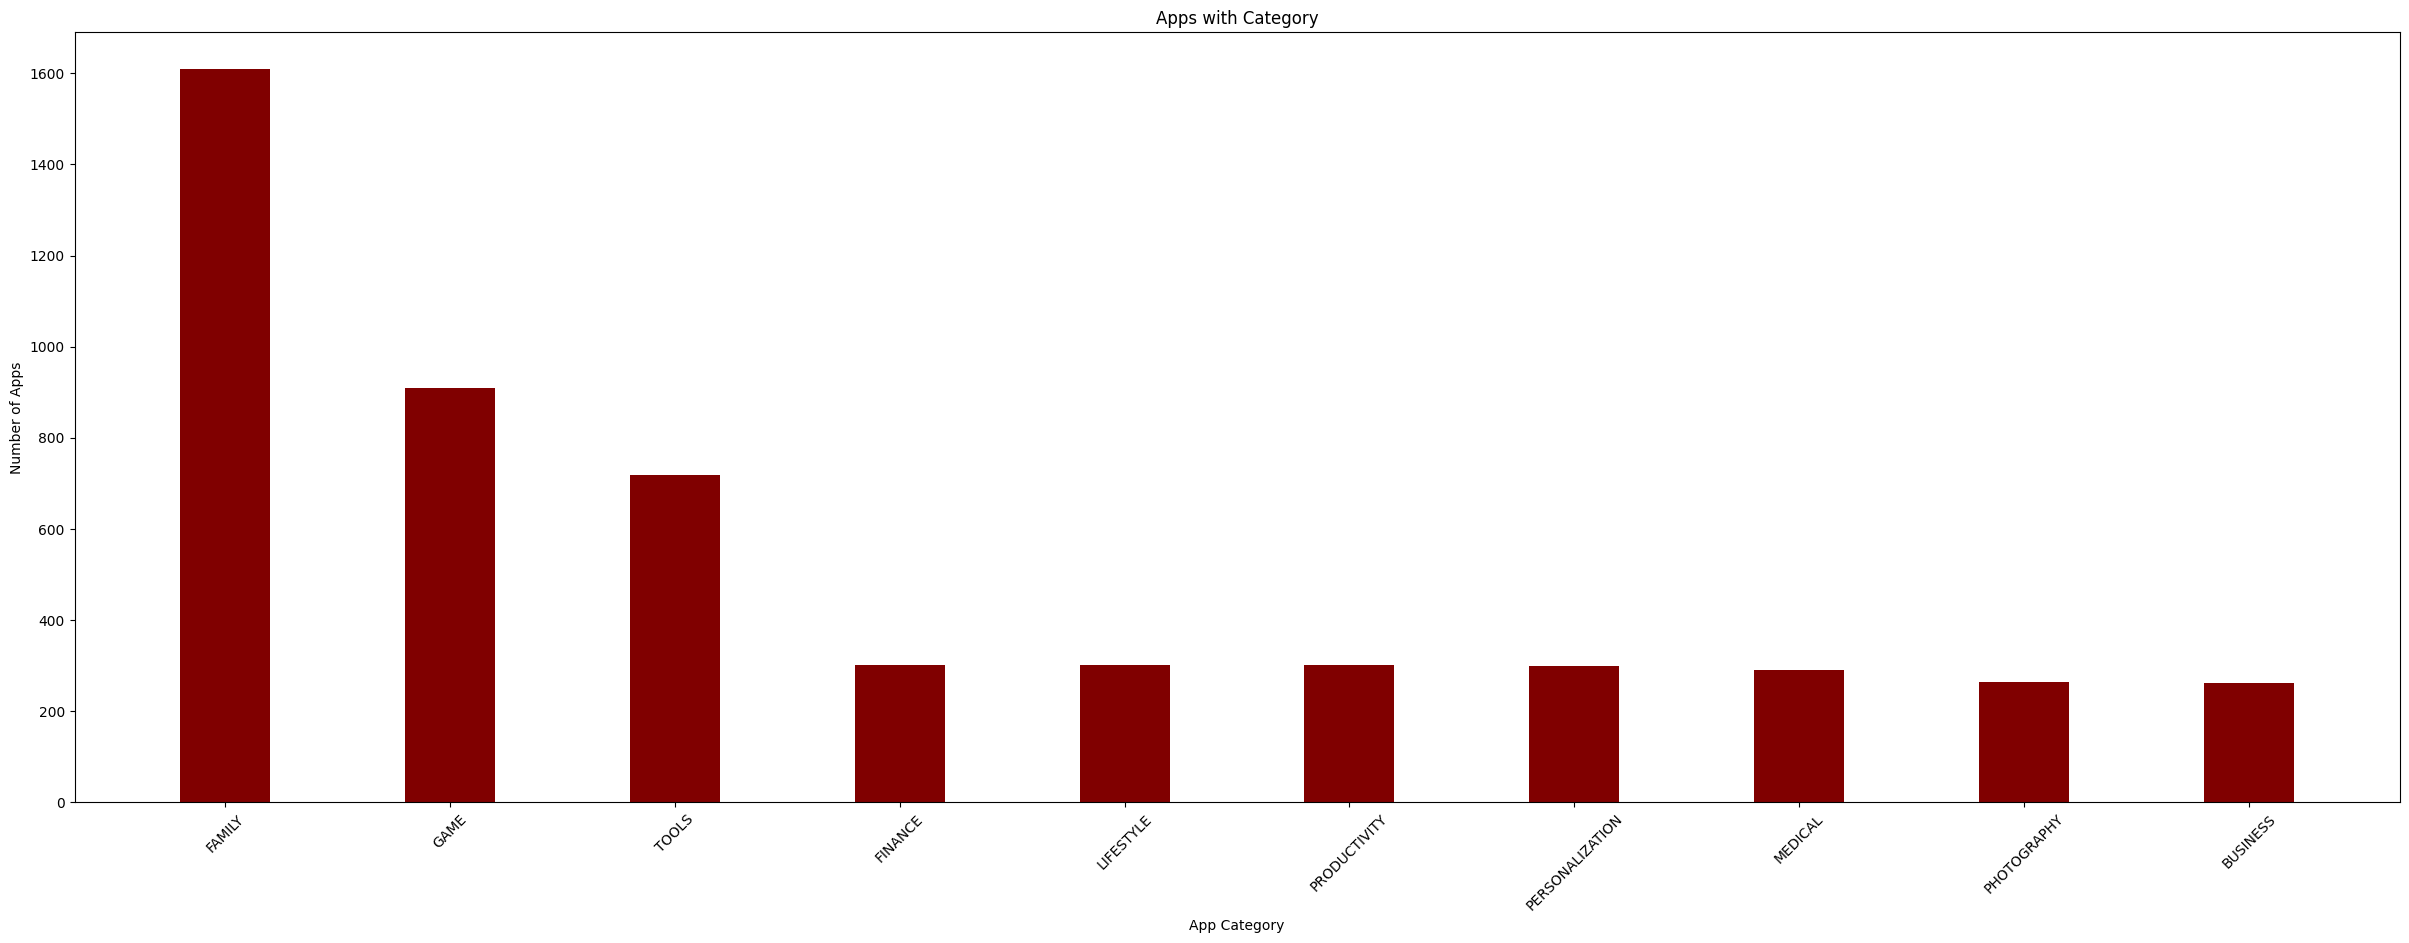

In [238]:

fig = plt.figure(figsize = (30, 10))
plt.bar(top10_category.index, top10_category.values, color ='maroon',
        width = 0.4)
plt.xlabel("App Category")
plt.xticks(rotation=45)
plt.ylabel("Number of Apps")
plt.title("Apps with Category")
plt.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [232]:
df_downloads = df_apps_clean.groupby('Category')[["Category","Installs"]].count()


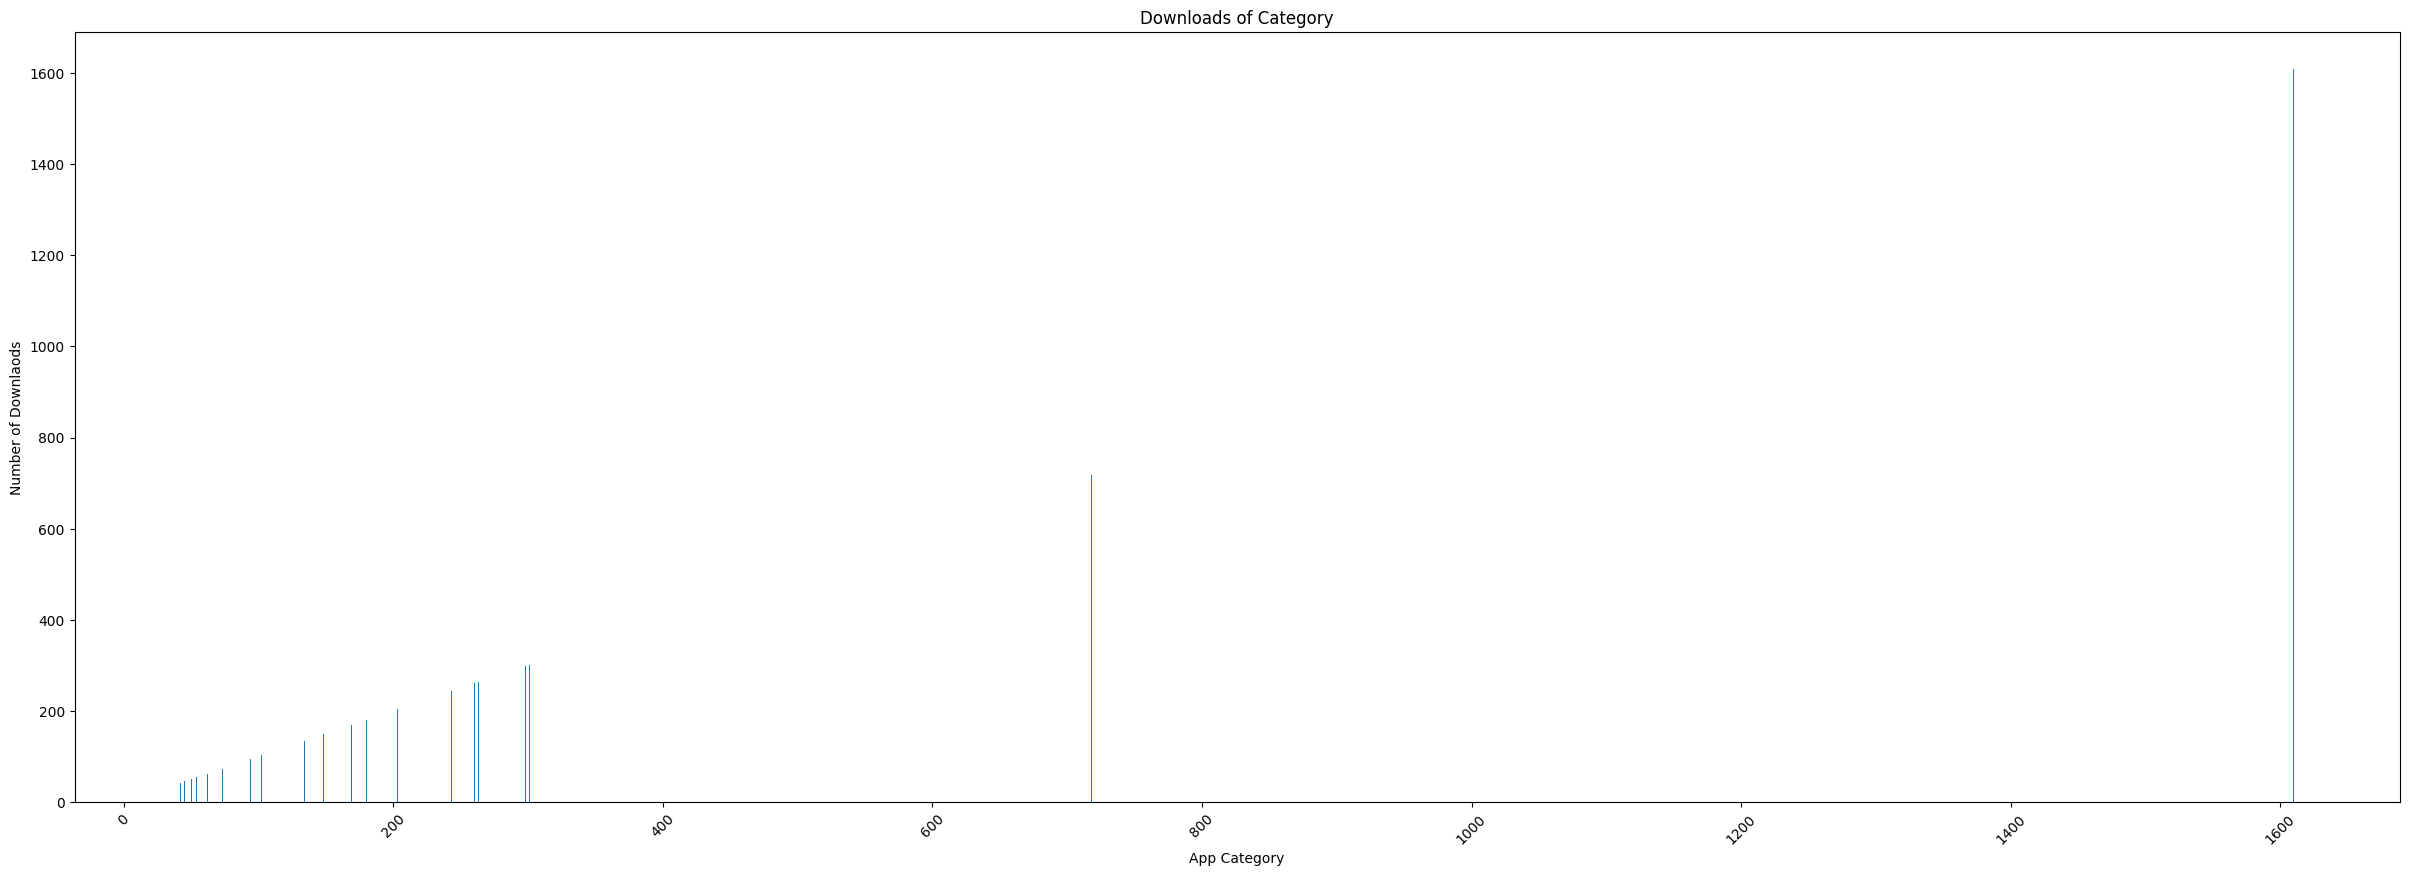

In [233]:
fig = plt.figure(figsize = (30, 10))
plt.bar(df_downloads["Category"], df_downloads["Installs"],
        width = 0.4)
plt.xlabel("App Category")
plt.xticks(rotation=45)
plt.ylabel("Number of Downlaods")
plt.title("Downloads of Category")
plt.show()

### Category Concentration - Downloads vs. Competition

**Challenge**:
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this.

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log')

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html).


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data?

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/).

* Find a way to set the colour scale using the color_continuous_scale parameter.
* Find a way to make the color axis disappear by using coloraxis_showscale.

# Grouped Bar Charts: Free vs. Paid Apps per Category

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart:

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category.

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value).

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart.

<img src=https://imgur.com/uVsECT3.png>


# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below:

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories.

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.